# ECG Analysis

In [1]:
import numpy as np
import pandas as pd
from aeon.datasets import load_classification
from aeon.datasets.dataset_collections import get_available_tsc_datasets

from SeqDT import *
from Representation import *
from ModelEvaluation import *
from Discretization import *
from TimeSeriesAnalysis import *

from sklearn.metrics import accuracy_score, confusion_matrix
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from sktime.classification.interval_based import TimeSeriesForestClassifier

In [2]:
available_datasets = get_available_tsc_datasets()

ecg_related = [d for d in available_datasets if 'ECG' in d or 'ecg' in d.lower()]

print("Dataset ECG available:")
for dataset in ecg_related:
    print(f"  - {dataset}")

Dataset ECG available:
  - CinCECGTorso
  - ECG200
  - ECG5000
  - ECGFiveDays
  - NonInvasiveFetalECGThorax1
  - NonInvasiveFetalECGThorax2
  - TwoLeadECG


In [ ]:
Summary = pd.DataFrame(columns=["Dataset","Classes","Method","Accuracy",
                                "G-Mean","Training_Time","Bins",
                                "Train Size","Test Size","Tree_Depth"])


In [4]:
def ECG_Analysis(dataset: str, methods: list = ['Classic', 'RLR'],
                 bins_values: list = [3, 5, 7], patients: list = [4, 6, 7], 
                 SeqDT_params: dict = None):
    
    global Summary
    
    if SeqDT_params == None:
        SeqDT_params = {
            'g': 1,
            'maxL': 4,
            'pru': True,
            'epsilon': 0.1,
            'minS': 0,
            'minN': 2,
            'maxD': 0,
            'visualize': True,
            'show_statistics': True
        }
    
    X_train, y_train = load_classification(dataset, split="train")
    X_test, y_test = load_classification(dataset, split="test")

    print(f"Training set: {X_train.shape}")
    print(f"Classes: {np.unique(y_train.astype(int))}")
    
    # Comparison with classical classification methods for Time Series
    ts_classifiers = {"KNN-RoC": KNeighborsTimeSeriesClassifier(n_neighbors=1, metric="dtw"),
                      "DETS": TimeSeriesForestClassifier(n_estimators=100, random_state=0)
                      }
    
    for classifier_name, classifier in ts_classifiers.items():
        start_time = time.time()
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        train_time = time.time() - start_time
        
        acc = accuracy_score(y_test, y_pred)
        
        if classifier_name == "DETS":
            depths = [estimator.tree_.max_depth for estimator in classifier.estimators_]
            tree_depth = np.mean(depths)
        else:
            tree_depth = np.nan
        
        result = {
            "Dataset": dataset,
            "Classes": len(np.unique(y_train)),
            "Method": classifier_name,
            "Accuracy": acc,
            "G-Mean": None,
            "Training_Time": train_time,
            "Bins": None,
            "Train Size": X_train.shape[0],
            "Test Size": X_test.shape[0],
            "Tree_Depth": tree_depth
        }
        
        if Summary.empty:
            Summary = pd.DataFrame([result])
        else:
            Summary = pd.concat([Summary, pd.DataFrame([result])], ignore_index=True)
             
                    
    #SeqDT methods:   

    for bin in bins_values:
        
        print(f'\n\nBINS: {bin}')
        for method in methods:
            
            if method == 'Classic':
                visualize = False
            else:
                visualize = True
            
            print(f'\nMETHOD: {method}')
            
            result = TSAnalysis(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, 
                                bins = bin, method= method, dataset_name= dataset,
                                patients_to_viz = patients, visualize_plots = visualize, SeqDT_parameters= SeqDT_params)
        
            
            Summary = pd.concat([Summary, pd.DataFrame([result])], ignore_index=True)
                

## CinCECGTorso

Training set: (40, 1, 1639)
Classes: [1 2 3 4]


BINS: 3

METHOD: Classic

SeqDT Evaluation (method: Classic, bins: 3)

Dataset Statistics:
Training samples: 40
Test samples: 1380
Classes: 4
Class distribution (train): {'1': 5, '3': 12, '4': 10, '2': 13}
Sequence length - Min: 1639, Max: 1639, Avg: 1639.00 ± 0.00

Training completed in 0.160s
Confusion matrix:
[[  0 282  68   0]
 [  0 319  23   0]
 [  0 285  58   0]
 [  0 326  19   0]]
Accuracy:  0.2732
G-mean:    0.0000


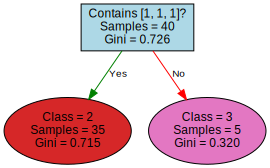

Tree depth: 2

METHOD: RLR



SeqDT Evaluation (method: RLR, bins: 3)

Dataset Statistics:
Training samples: 40
Test samples: 1380
Classes: 4
Class distribution (train): {'1': 5, '3': 12, '4': 10, '2': 13}
Sequence length - Min: 5, Max: 195, Avg: 29.32 ± 36.35

Training completed in 0.108s
Confusion matrix:
[[  0 222  89  39]
 [  0 197  52  93]
 [  0 148 115  80]
 [  0  94  66 185]]
Accuracy:  0.3601
G-mean:    0.0000


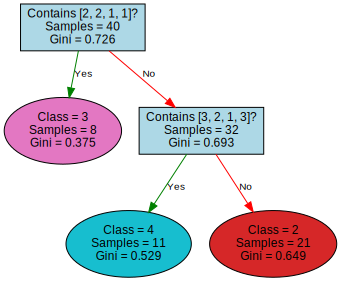

Tree depth: 3


BINS: 5

METHOD: Classic

SeqDT Evaluation (method: Classic, bins: 5)

Dataset Statistics:
Training samples: 40
Test samples: 1380
Classes: 4
Class distribution (train): {'1': 5, '3': 12, '4': 10, '2': 13}
Sequence length - Min: 1639, Max: 1639, Avg: 1639.00 ± 0.00

Training completed in 1.152s
Confusion matrix:
[[ 68 219  21  42]
 [ 25 262  21  34]
 [ 41 250  21  31]
 [ 11 240   5  89]]
Accuracy:  0.3188
G-mean:    0.2202


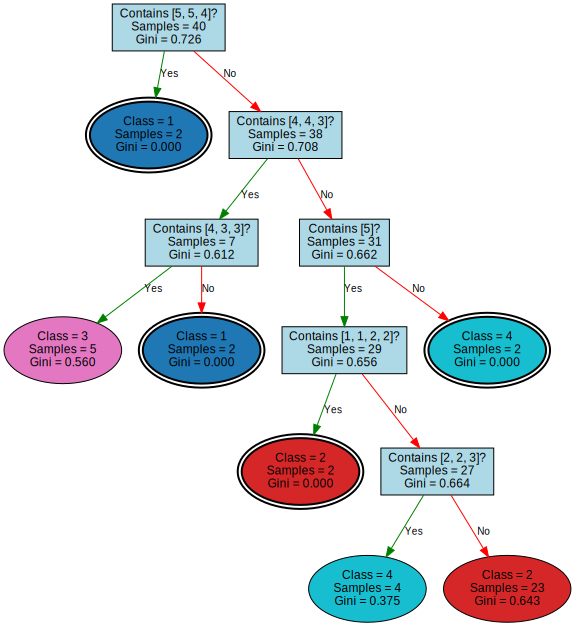

Tree depth: 6

METHOD: RLR



SeqDT Evaluation (method: RLR, bins: 5)

Dataset Statistics:
Training samples: 40
Test samples: 1380
Classes: 4
Class distribution (train): {'1': 5, '3': 12, '4': 10, '2': 13}
Sequence length - Min: 16, Max: 121, Avg: 50.23 ± 26.23

Training completed in 0.203s
Confusion matrix:
[[ 83  26 169  72]
 [ 49  54 141  98]
 [ 60  61 168  54]
 [ 14  20  95 216]]
Accuracy:  0.3775
G-mean:    0.3273


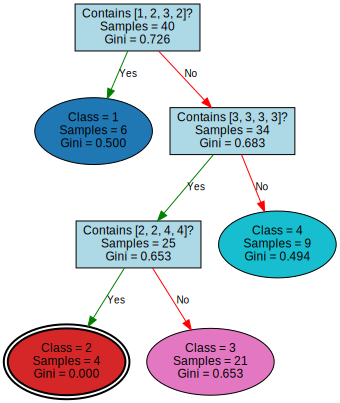

Tree depth: 4


BINS: 7

METHOD: Classic

SeqDT Evaluation (method: Classic, bins: 7)

Dataset Statistics:
Training samples: 40
Test samples: 1380
Classes: 4
Class distribution (train): {'1': 5, '3': 12, '4': 10, '2': 13}
Sequence length - Min: 1639, Max: 1639, Avg: 1639.00 ± 0.00

Training completed in 2.059s
Confusion matrix:
[[ 34  86 110 120]
 [  8  72  68 194]
 [ 20  72 102 149]
 [ 11  45  69 220]]
Accuracy:  0.3101
G-mean:    0.2495


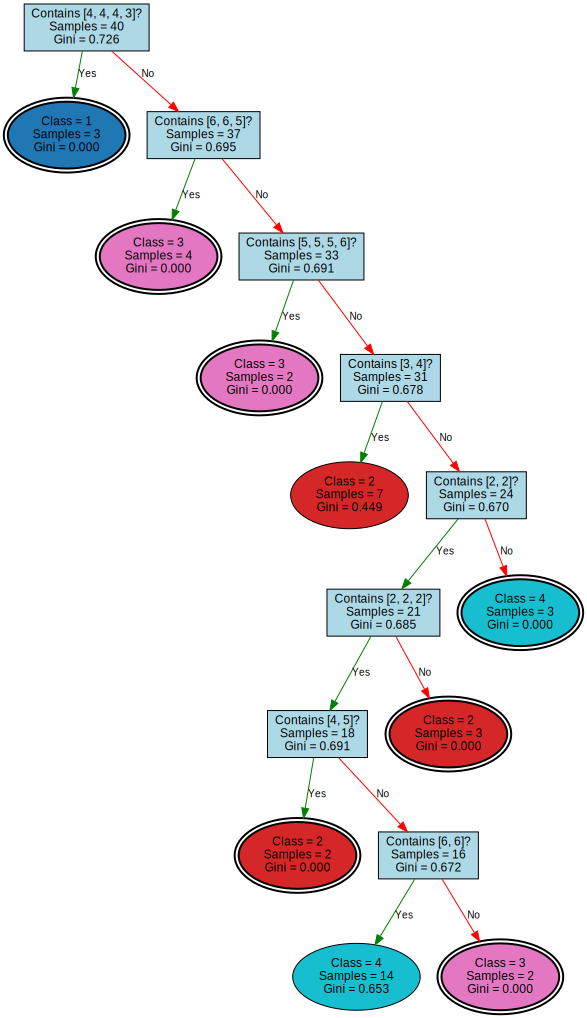

Tree depth: 9

METHOD: RLR



SeqDT Evaluation (method: RLR, bins: 7)

Dataset Statistics:
Training samples: 40
Test samples: 1380
Classes: 4
Class distribution (train): {'1': 5, '3': 12, '4': 10, '2': 13}
Sequence length - Min: 20, Max: 228, Avg: 64.65 ± 41.44

Training completed in 0.198s
Confusion matrix:
[[ 45 155  94  56]
 [ 47 122  84  89]
 [ 58  99 104  82]
 [ 17 147  42 139]]
Accuracy:  0.2971
G-mean:    0.2736


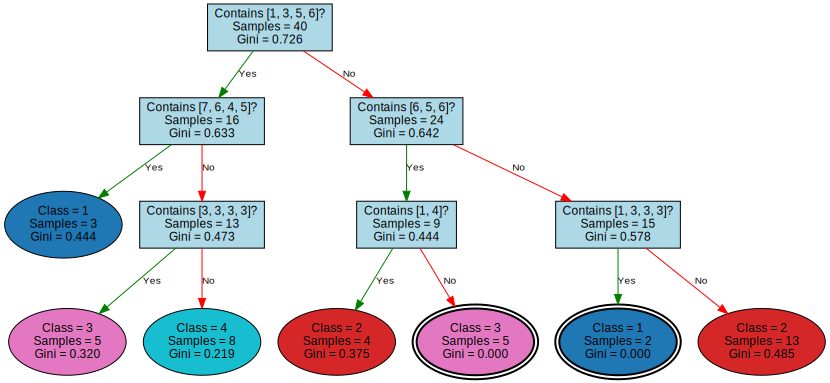

Tree depth: 4


In [5]:
ECG_Analysis("CinCECGTorso")

## ECG200


Training set: (100, 1, 96)
Classes: [-1  1]


BINS: 3

METHOD: Classic

SeqDT Evaluation (method: Classic, bins: 3)

Dataset Statistics:
Training samples: 100
Test samples: 100
Classes: 2
Class distribution (train): {'-1': 31, '1': 69}
Sequence length - Min: 96, Max: 96, Avg: 96.00 ± 0.00

Training completed in 0.094s
Confusion matrix:
[[27  9]
 [21 43]]
Accuracy:  0.7000
G-mean:    0.7099


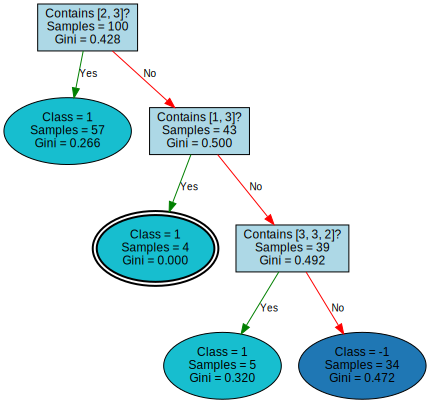

Tree depth: 4

METHOD: RLR



SeqDT Evaluation (method: RLR, bins: 3)

Dataset Statistics:
Training samples: 100
Test samples: 100
Classes: 2
Class distribution (train): {'-1': 31, '1': 69}
Sequence length - Min: 5, Max: 35, Avg: 14.75 ± 5.69

Training completed in 0.166s
Confusion matrix:
[[ 5 31]
 [ 1 63]]
Accuracy:  0.6800
G-mean:    0.3698


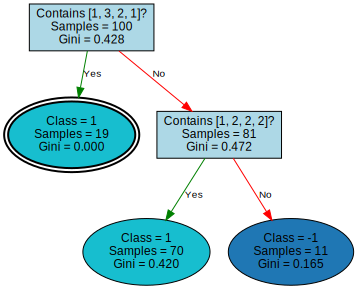

Tree depth: 3


BINS: 5

METHOD: Classic

SeqDT Evaluation (method: Classic, bins: 5)

Dataset Statistics:
Training samples: 100
Test samples: 100
Classes: 2
Class distribution (train): {'-1': 31, '1': 69}
Sequence length - Min: 96, Max: 96, Avg: 96.00 ± 0.00

Training completed in 0.208s
Confusion matrix:
[[20 16]
 [22 42]]
Accuracy:  0.6200
G-mean:    0.6038


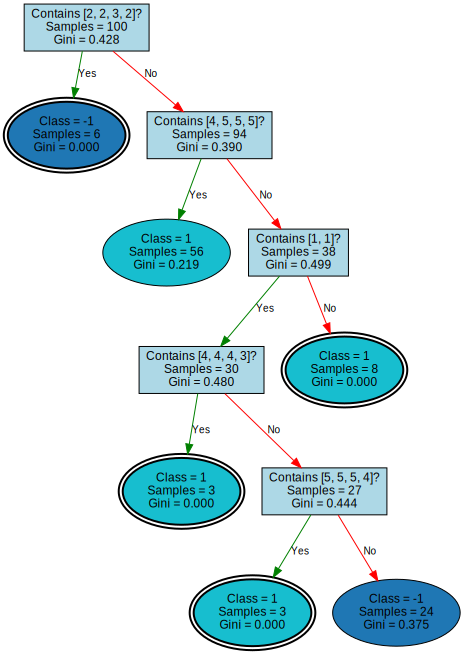

Tree depth: 6

METHOD: RLR



SeqDT Evaluation (method: RLR, bins: 5)

Dataset Statistics:
Training samples: 100
Test samples: 100
Classes: 2
Class distribution (train): {'-1': 31, '1': 69}
Sequence length - Min: 11, Max: 46, Avg: 22.93 ± 7.60

Training completed in 0.193s
Confusion matrix:
[[ 8 28]
 [ 5 59]]
Accuracy:  0.6700
G-mean:    0.4526


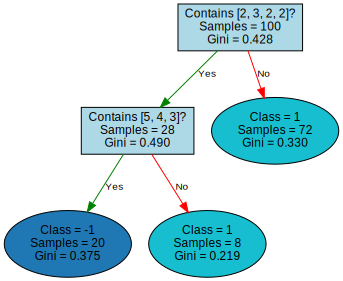

Tree depth: 3


BINS: 7

METHOD: Classic

SeqDT Evaluation (method: Classic, bins: 7)

Dataset Statistics:
Training samples: 100
Test samples: 100
Classes: 2
Class distribution (train): {'-1': 31, '1': 69}
Sequence length - Min: 96, Max: 96, Avg: 96.00 ± 0.00

Training completed in 0.224s
Confusion matrix:
[[17 19]
 [10 54]]
Accuracy:  0.7100
G-mean:    0.6312


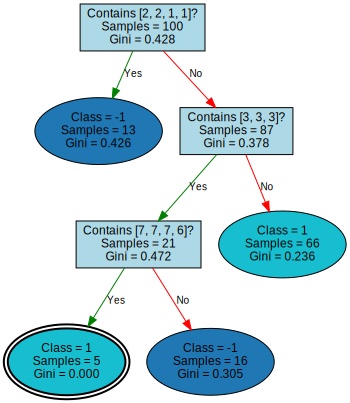

Tree depth: 4

METHOD: RLR



SeqDT Evaluation (method: RLR, bins: 7)

Dataset Statistics:
Training samples: 100
Test samples: 100
Classes: 2
Class distribution (train): {'-1': 31, '1': 69}
Sequence length - Min: 16, Max: 58, Avg: 30.94 ± 8.10

Training completed in 0.206s
Confusion matrix:
[[10 26]
 [14 50]]
Accuracy:  0.6000
G-mean:    0.4658


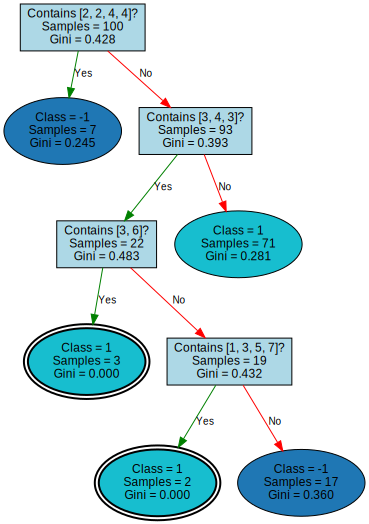

Tree depth: 5


In [6]:
ECG_Analysis("ECG200")

## ECG5000


Training set: (500, 1, 140)
Classes: [1 2 3 4 5]


BINS: 3

METHOD: Classic

SeqDT Evaluation (method: Classic, bins: 3)

Dataset Statistics:
Training samples: 500
Test samples: 4500
Classes: 5
Class distribution (train): {'1': 292, '2': 177, '3': 10, '4': 19, '5': 2}
Sequence length - Min: 140, Max: 140, Avg: 140.00 ± 0.00

Training completed in 1.719s
Confusion matrix:
[[2488  139    0    0    0]
 [1199  391    0    0    0]
 [  67   19    0    0    0]
 [ 154   21    0    0    0]
 [  21    1    0    0    0]]
Accuracy:  0.6398
G-mean:    0.0000


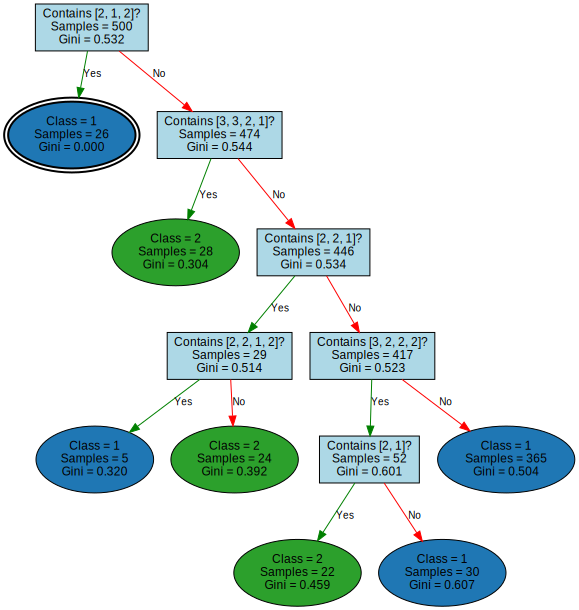

Tree depth: 6

METHOD: RLR



SeqDT Evaluation (method: RLR, bins: 3)

Dataset Statistics:
Training samples: 500
Test samples: 4500
Classes: 5
Class distribution (train): {'1': 292, '2': 177, '3': 10, '4': 19, '5': 2}
Sequence length - Min: 3, Max: 59, Avg: 14.34 ± 5.86

Training completed in 0.553s
Confusion matrix:
[[1926  692    0    9    0]
 [  93 1491    0    6    0]
 [  26   58    0    2    0]
 [  57   94    0   24    0]
 [   7   15    0    0    0]]
Accuracy:  0.7647
G-mean:    0.0000


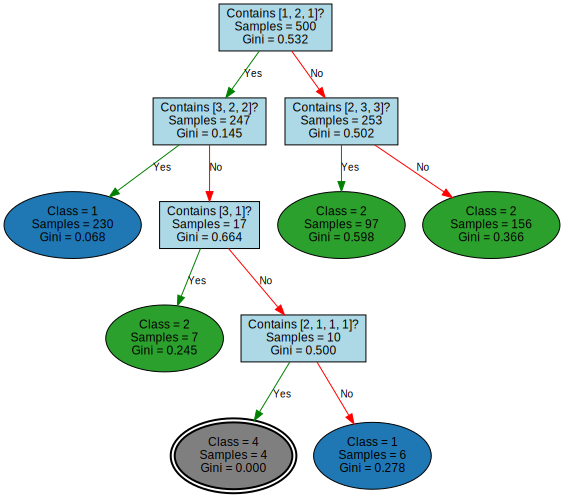

Tree depth: 5


BINS: 5

METHOD: Classic

SeqDT Evaluation (method: Classic, bins: 5)

Dataset Statistics:
Training samples: 500
Test samples: 4500
Classes: 5
Class distribution (train): {'1': 292, '2': 177, '3': 10, '4': 19, '5': 2}
Sequence length - Min: 140, Max: 140, Avg: 140.00 ± 0.00

Training completed in 2.889s
Confusion matrix:
[[2433  194    0    0    0]
 [ 382 1208    0    0    0]
 [  48   38    0    0    0]
 [  87   88    0    0    0]
 [  16    6    0    0    0]]
Accuracy:  0.8091
G-mean:    0.0000


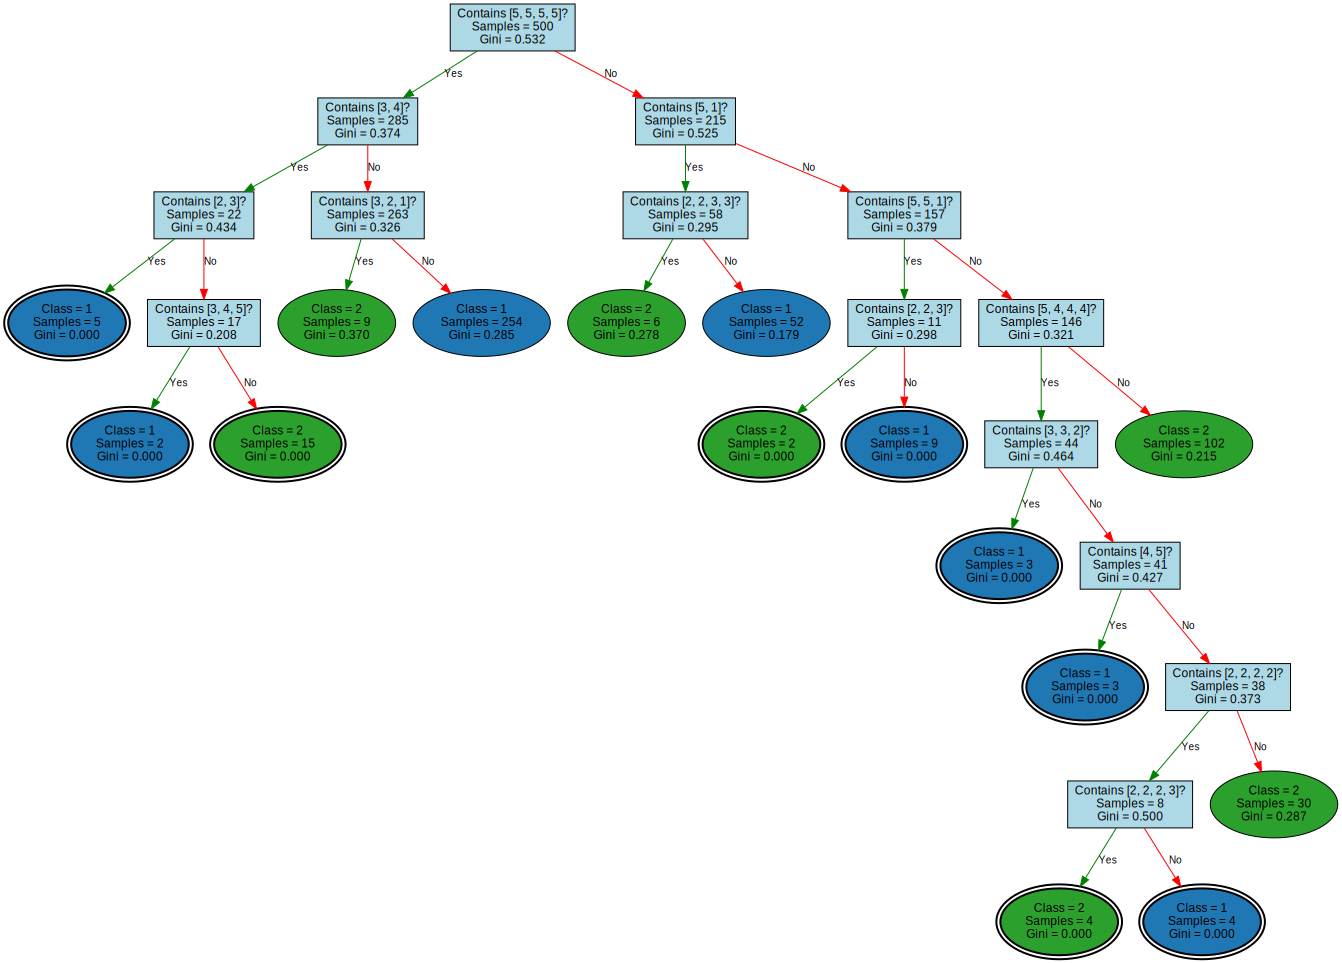

Tree depth: 9

METHOD: RLR



SeqDT Evaluation (method: RLR, bins: 5)

Dataset Statistics:
Training samples: 500
Test samples: 4500
Classes: 5
Class distribution (train): {'1': 292, '2': 177, '3': 10, '4': 19, '5': 2}
Sequence length - Min: 7, Max: 82, Avg: 20.08 ± 6.99

Training completed in 0.963s
Confusion matrix:
[[2457  170    0    0    0]
 [ 186 1404    0    0    0]
 [  38   48    0    0    0]
 [  79   96    0    0    0]
 [  16    6    0    0    0]]
Accuracy:  0.8580
G-mean:    0.0000


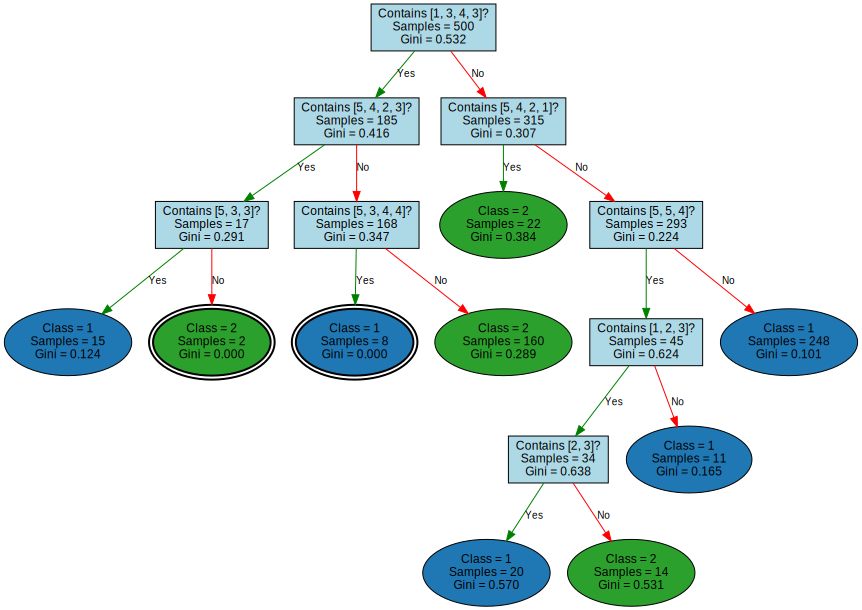

Tree depth: 6


BINS: 7

METHOD: Classic

SeqDT Evaluation (method: Classic, bins: 7)

Dataset Statistics:
Training samples: 500
Test samples: 4500
Classes: 5
Class distribution (train): {'1': 292, '2': 177, '3': 10, '4': 19, '5': 2}
Sequence length - Min: 140, Max: 140, Avg: 140.00 ± 0.00

Training completed in 4.442s
Confusion matrix:
[[2537   90    0    0    0]
 [ 276 1314    0    0    0]
 [  43   43    0    0    0]
 [  77   98    0    0    0]
 [  17    5    0    0    0]]
Accuracy:  0.8558
G-mean:    0.0000


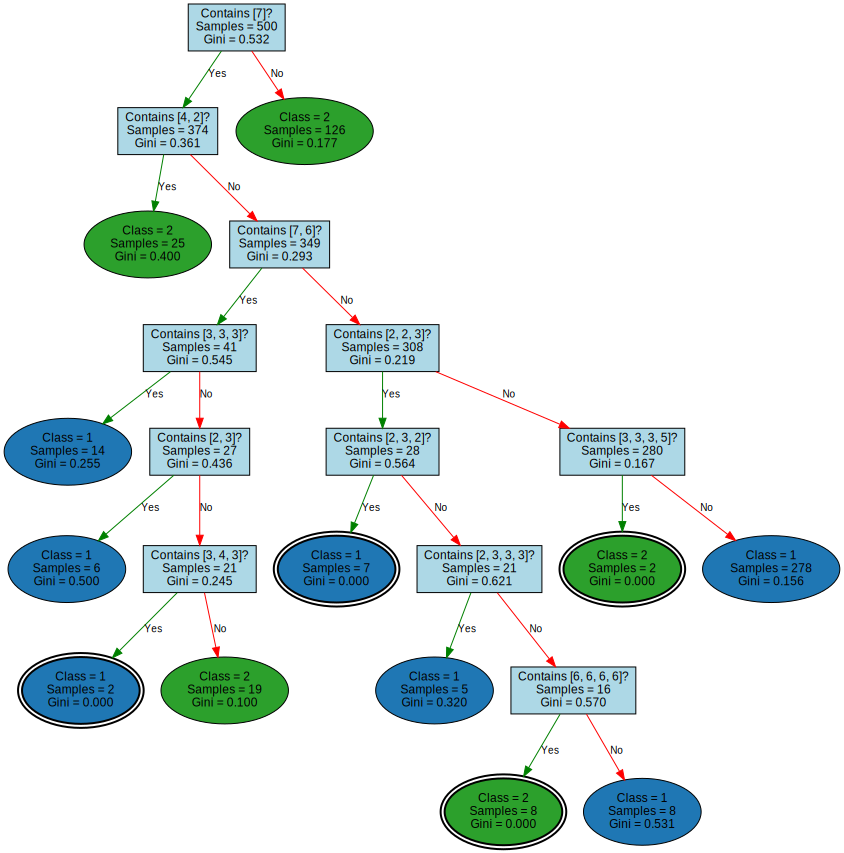

Tree depth: 8

METHOD: RLR



SeqDT Evaluation (method: RLR, bins: 7)

Dataset Statistics:
Training samples: 500
Test samples: 4500
Classes: 5
Class distribution (train): {'1': 292, '2': 177, '3': 10, '4': 19, '5': 2}
Sequence length - Min: 8, Max: 92, Avg: 28.39 ± 8.83

Training completed in 0.956s
Confusion matrix:
[[2466  112    0   49    0]
 [ 210 1354   20    6    0]
 [  53   30    1    2    0]
 [  71   95    2    7    0]
 [  14    8    0    0    0]]
Accuracy:  0.8507
G-mean:    0.0000


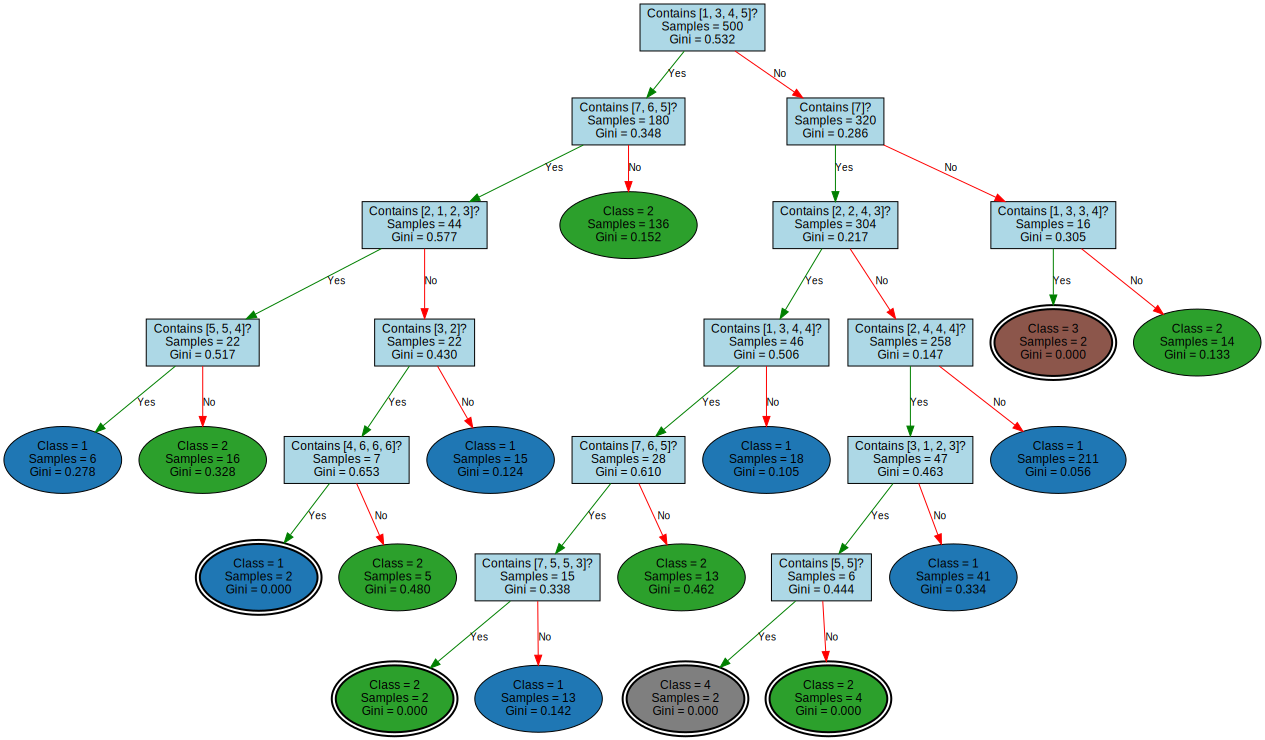

Tree depth: 7


In [7]:
ECG_Analysis("ECG5000")

## ECGFiveDays


Training set: (23, 1, 136)
Classes: [1 2]


BINS: 3

METHOD: Classic

SeqDT Evaluation (method: Classic, bins: 3)

Dataset Statistics:
Training samples: 23
Test samples: 861
Classes: 2
Class distribution (train): {'1': 14, '2': 9}
Sequence length - Min: 136, Max: 136, Avg: 136.00 ± 0.00

Training completed in 0.022s
Confusion matrix:
[[428   0]
 [433   0]]
Accuracy:  0.4971
G-mean:    0.0000


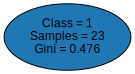

Tree depth: 1

METHOD: RLR



SeqDT Evaluation (method: RLR, bins: 3)

Dataset Statistics:
Training samples: 23
Test samples: 861
Classes: 2
Class distribution (train): {'1': 14, '2': 9}
Sequence length - Min: 6, Max: 18, Avg: 8.00 ± 3.24

Training completed in 0.045s
Confusion matrix:
[[428   0]
 [433   0]]
Accuracy:  0.4971
G-mean:    0.0000


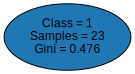

Tree depth: 1


BINS: 5

METHOD: Classic

SeqDT Evaluation (method: Classic, bins: 5)

Dataset Statistics:
Training samples: 23
Test samples: 861
Classes: 2
Class distribution (train): {'1': 14, '2': 9}
Sequence length - Min: 136, Max: 136, Avg: 136.00 ± 0.00

Training completed in 0.052s
Confusion matrix:
[[428   0]
 [433   0]]
Accuracy:  0.4971
G-mean:    0.0000


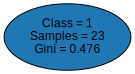

Tree depth: 1

METHOD: RLR



SeqDT Evaluation (method: RLR, bins: 5)

Dataset Statistics:
Training samples: 23
Test samples: 861
Classes: 2
Class distribution (train): {'1': 14, '2': 9}
Sequence length - Min: 10, Max: 26, Avg: 17.52 ± 3.89

Training completed in 0.041s
Confusion matrix:
[[368  60]
 [262 171]]
Accuracy:  0.6260
G-mean:    0.5827


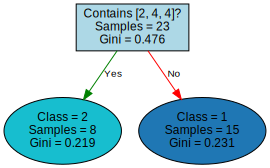

Tree depth: 2


BINS: 7

METHOD: Classic

SeqDT Evaluation (method: Classic, bins: 7)

Dataset Statistics:
Training samples: 23
Test samples: 861
Classes: 2
Class distribution (train): {'1': 14, '2': 9}
Sequence length - Min: 136, Max: 136, Avg: 136.00 ± 0.00

Training completed in 0.092s
Confusion matrix:
[[359  69]
 [353  80]]
Accuracy:  0.5099
G-mean:    0.3937


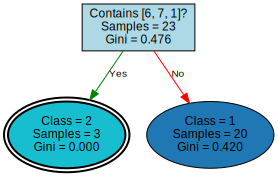

Tree depth: 2

METHOD: RLR



SeqDT Evaluation (method: RLR, bins: 7)

Dataset Statistics:
Training samples: 23
Test samples: 861
Classes: 2
Class distribution (train): {'1': 14, '2': 9}
Sequence length - Min: 14, Max: 37, Avg: 23.00 ± 5.55

Training completed in 0.010s
Confusion matrix:
[[428   0]
 [433   0]]
Accuracy:  0.4971
G-mean:    0.0000


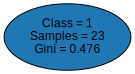

Tree depth: 1


In [8]:
ECG_Analysis("ECGFiveDays")

## NonInvasiveFetalECGThorax1


Training set: (1800, 1, 750)
Classes: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


BINS: 3

METHOD: Classic

SeqDT Evaluation (method: Classic, bins: 3)

Dataset Statistics:
Training samples: 1800
Test samples: 1965
Classes: 42
Class distribution (train): {'33': 37, '9': 46, '10': 56, '21': 43, '3': 45, '1': 36, '29': 47, '28': 40, '35': 45, '31': 43, '12': 39, '25': 41, '13': 46, '4': 40, '23': 35, '38': 41, '42': 45, '16': 39, '8': 50, '15': 40, '2': 52, '6': 44, '14': 42, '18': 45, '37': 37, '20': 49, '11': 36, '7': 36, '5': 48, '19': 40, '40': 45, '41': 39, '22': 40, '24': 41, '30': 40, '17': 52, '34': 52, '26': 37, '39': 43, '27': 47, '32': 41, '36': 40}
Sequence length - Min: 750, Max: 750, Avg: 750.00 ± 0.00

Training completed in 3.418s
Confusion matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy:  0.0555
G-m

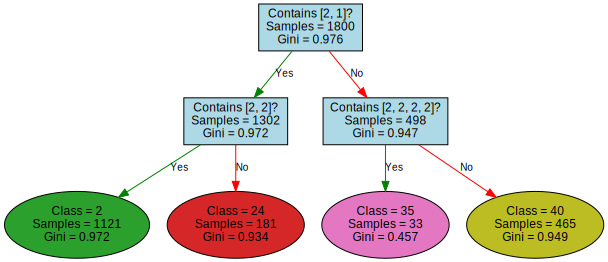

Tree depth: 3

METHOD: RLR



SeqDT Evaluation (method: RLR, bins: 3)

Dataset Statistics:
Training samples: 1800
Test samples: 1965
Classes: 42
Class distribution (train): {'33': 37, '9': 46, '10': 56, '21': 43, '3': 45, '1': 36, '29': 47, '28': 40, '35': 45, '31': 43, '12': 39, '25': 41, '13': 46, '4': 40, '23': 35, '38': 41, '42': 45, '16': 39, '8': 50, '15': 40, '2': 52, '6': 44, '14': 42, '18': 45, '37': 37, '20': 49, '11': 36, '7': 36, '5': 48, '19': 40, '40': 45, '41': 39, '22': 40, '24': 41, '30': 40, '17': 52, '34': 52, '26': 37, '39': 43, '27': 47, '32': 41, '36': 40}
Sequence length - Min: 9, Max: 73, Avg: 20.41 ± 8.52

Training completed in 6.094s
Confusion matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy:  0.0728
G-mean:    0.0000


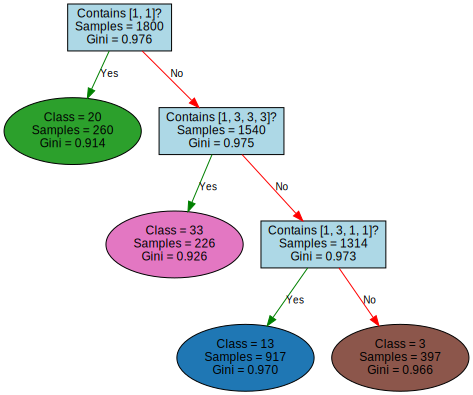

Tree depth: 4


BINS: 5

METHOD: Classic

SeqDT Evaluation (method: Classic, bins: 5)

Dataset Statistics:
Training samples: 1800
Test samples: 1965
Classes: 42
Class distribution (train): {'33': 37, '9': 46, '10': 56, '21': 43, '3': 45, '1': 36, '29': 47, '28': 40, '35': 45, '31': 43, '12': 39, '25': 41, '13': 46, '4': 40, '23': 35, '38': 41, '42': 45, '16': 39, '8': 50, '15': 40, '2': 52, '6': 44, '14': 42, '18': 45, '37': 37, '20': 49, '11': 36, '7': 36, '5': 48, '19': 40, '40': 45, '41': 39, '22': 40, '24': 41, '30': 40, '17': 52, '34': 52, '26': 37, '39': 43, '27': 47, '32': 41, '36': 40}
Sequence length - Min: 750, Max: 750, Avg: 750.00 ± 0.00

Training completed in 12.342s
Confusion matrix:
[[ 0 21  0 ...  0  0  0]
 [ 0 16  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  7  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]]
Accuracy:  0.0896
G-mean:    0.0000


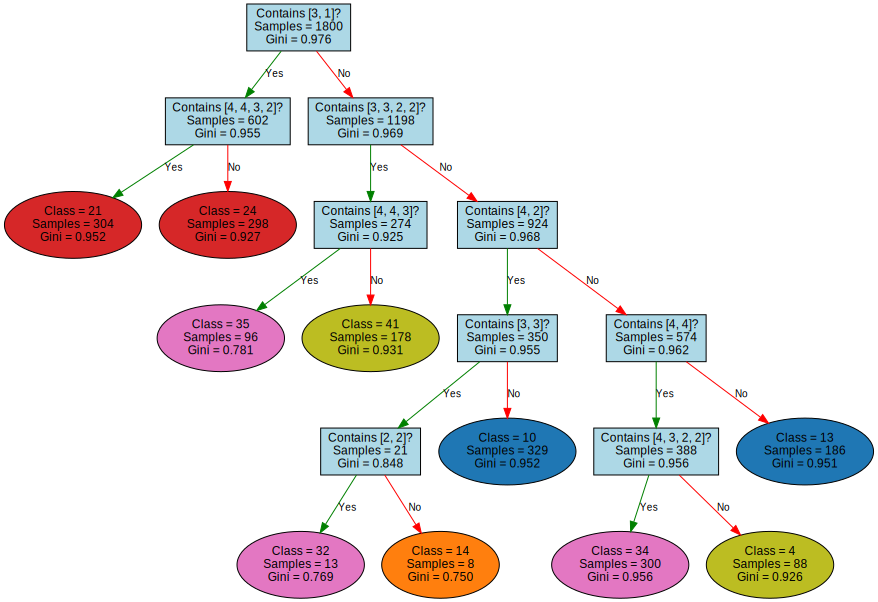

Tree depth: 6

METHOD: RLR



SeqDT Evaluation (method: RLR, bins: 5)

Dataset Statistics:
Training samples: 1800
Test samples: 1965
Classes: 42
Class distribution (train): {'33': 37, '9': 46, '10': 56, '21': 43, '3': 45, '1': 36, '29': 47, '28': 40, '35': 45, '31': 43, '12': 39, '25': 41, '13': 46, '4': 40, '23': 35, '38': 41, '42': 45, '16': 39, '8': 50, '15': 40, '2': 52, '6': 44, '14': 42, '18': 45, '37': 37, '20': 49, '11': 36, '7': 36, '5': 48, '19': 40, '40': 45, '41': 39, '22': 40, '24': 41, '30': 40, '17': 52, '34': 52, '26': 37, '39': 43, '27': 47, '32': 41, '36': 40}
Sequence length - Min: 17, Max: 65, Avg: 28.24 ± 6.84

Training completed in 7.041s
Confusion matrix:
[[ 0  0  0 ...  0  0  3]
 [ 0  0  0 ...  0  0  3]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  8]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0 30]]
Accuracy:  0.0840
G-mean:    0.0000


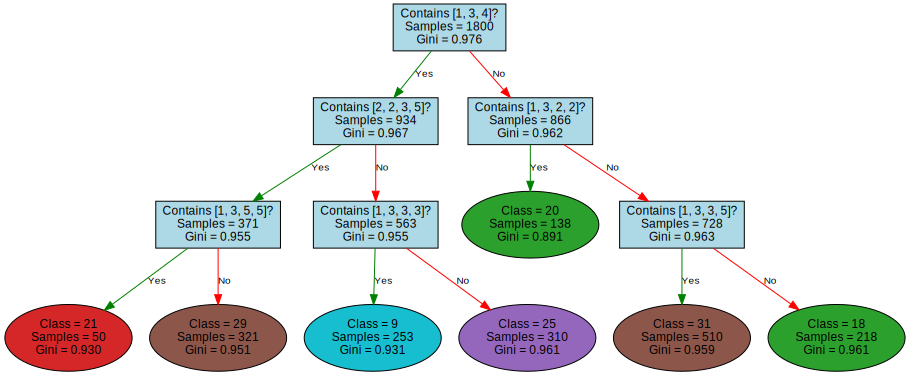

Tree depth: 4


BINS: 7

METHOD: Classic

SeqDT Evaluation (method: Classic, bins: 7)

Dataset Statistics:
Training samples: 1800
Test samples: 1965
Classes: 42
Class distribution (train): {'33': 37, '9': 46, '10': 56, '21': 43, '3': 45, '1': 36, '29': 47, '28': 40, '35': 45, '31': 43, '12': 39, '25': 41, '13': 46, '4': 40, '23': 35, '38': 41, '42': 45, '16': 39, '8': 50, '15': 40, '2': 52, '6': 44, '14': 42, '18': 45, '37': 37, '20': 49, '11': 36, '7': 36, '5': 48, '19': 40, '40': 45, '41': 39, '22': 40, '24': 41, '30': 40, '17': 52, '34': 52, '26': 37, '39': 43, '27': 47, '32': 41, '36': 40}
Sequence length - Min: 750, Max: 750, Avg: 750.00 ± 0.00

Training completed in 41.400s
Confusion matrix:
[[ 0  5  0 ...  0  8  2]
 [ 0  2  0 ...  0 16  0]
 [ 0  0 17 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  1]
 [ 0  4  0 ...  0 27  0]
 [ 0  0  0 ...  0  0  6]]
Accuracy:  0.1517
G-mean:    0.0000


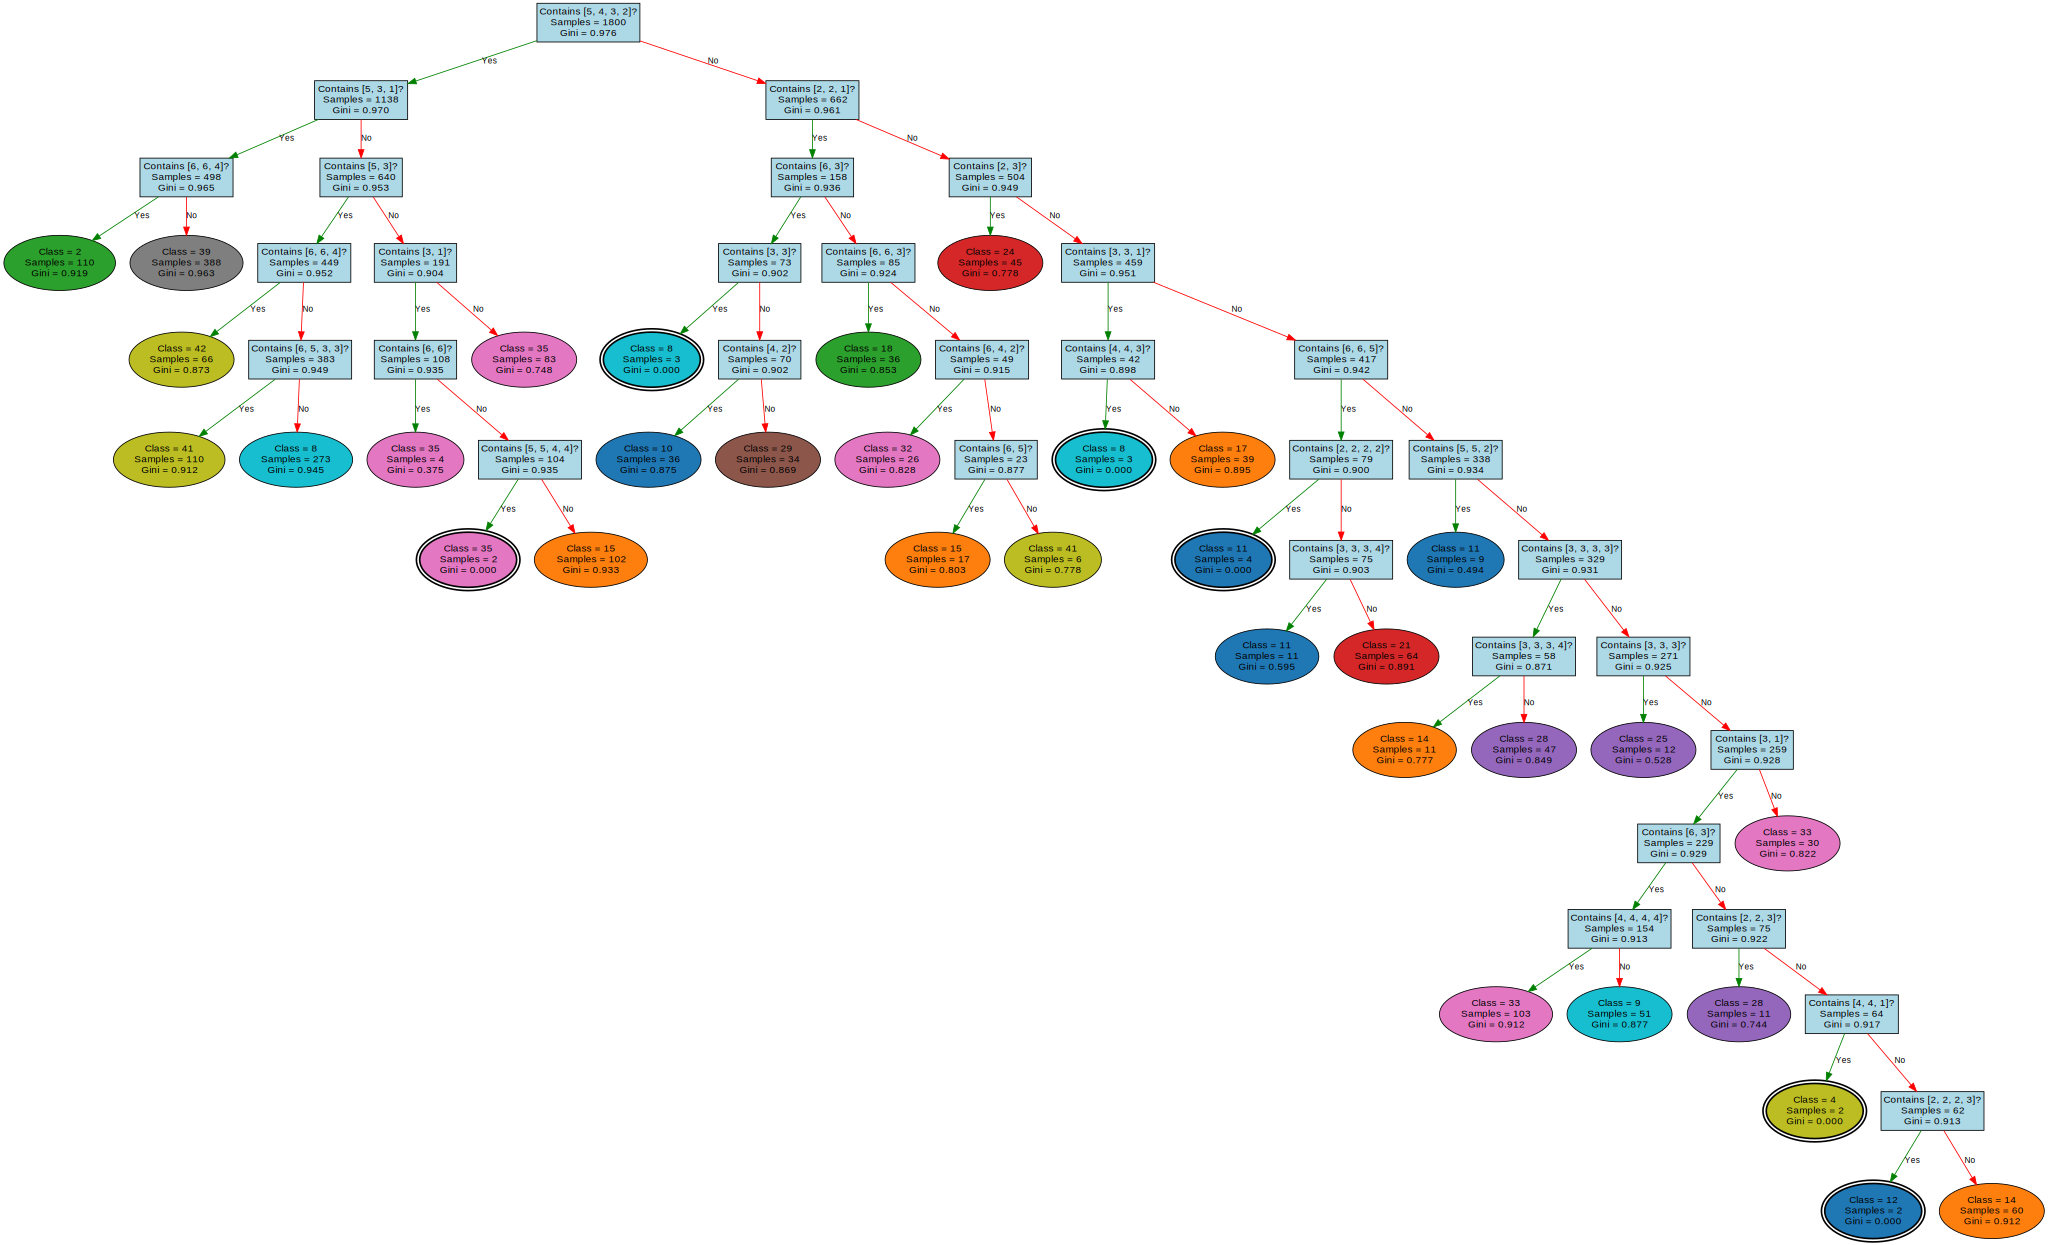

Tree depth: 14

METHOD: RLR



SeqDT Evaluation (method: RLR, bins: 7)

Dataset Statistics:
Training samples: 1800
Test samples: 1965
Classes: 42
Class distribution (train): {'33': 37, '9': 46, '10': 56, '21': 43, '3': 45, '1': 36, '29': 47, '28': 40, '35': 45, '31': 43, '12': 39, '25': 41, '13': 46, '4': 40, '23': 35, '38': 41, '42': 45, '16': 39, '8': 50, '15': 40, '2': 52, '6': 44, '14': 42, '18': 45, '37': 37, '20': 49, '11': 36, '7': 36, '5': 48, '19': 40, '40': 45, '41': 39, '22': 40, '24': 41, '30': 40, '17': 52, '34': 52, '26': 37, '39': 43, '27': 47, '32': 41, '36': 40}
Sequence length - Min: 25, Max: 92, Avg: 40.88 ± 9.67

Training completed in 27.656s
Confusion matrix:
[[ 0  0  0 ...  1  0  4]
 [ 0  0  0 ...  2  0  1]
 [ 0  0  3 ...  0  0  0]
 ...
 [ 0  0  0 ... 29  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  5  0  4]]
Accuracy:  0.1130
G-mean:    0.0000


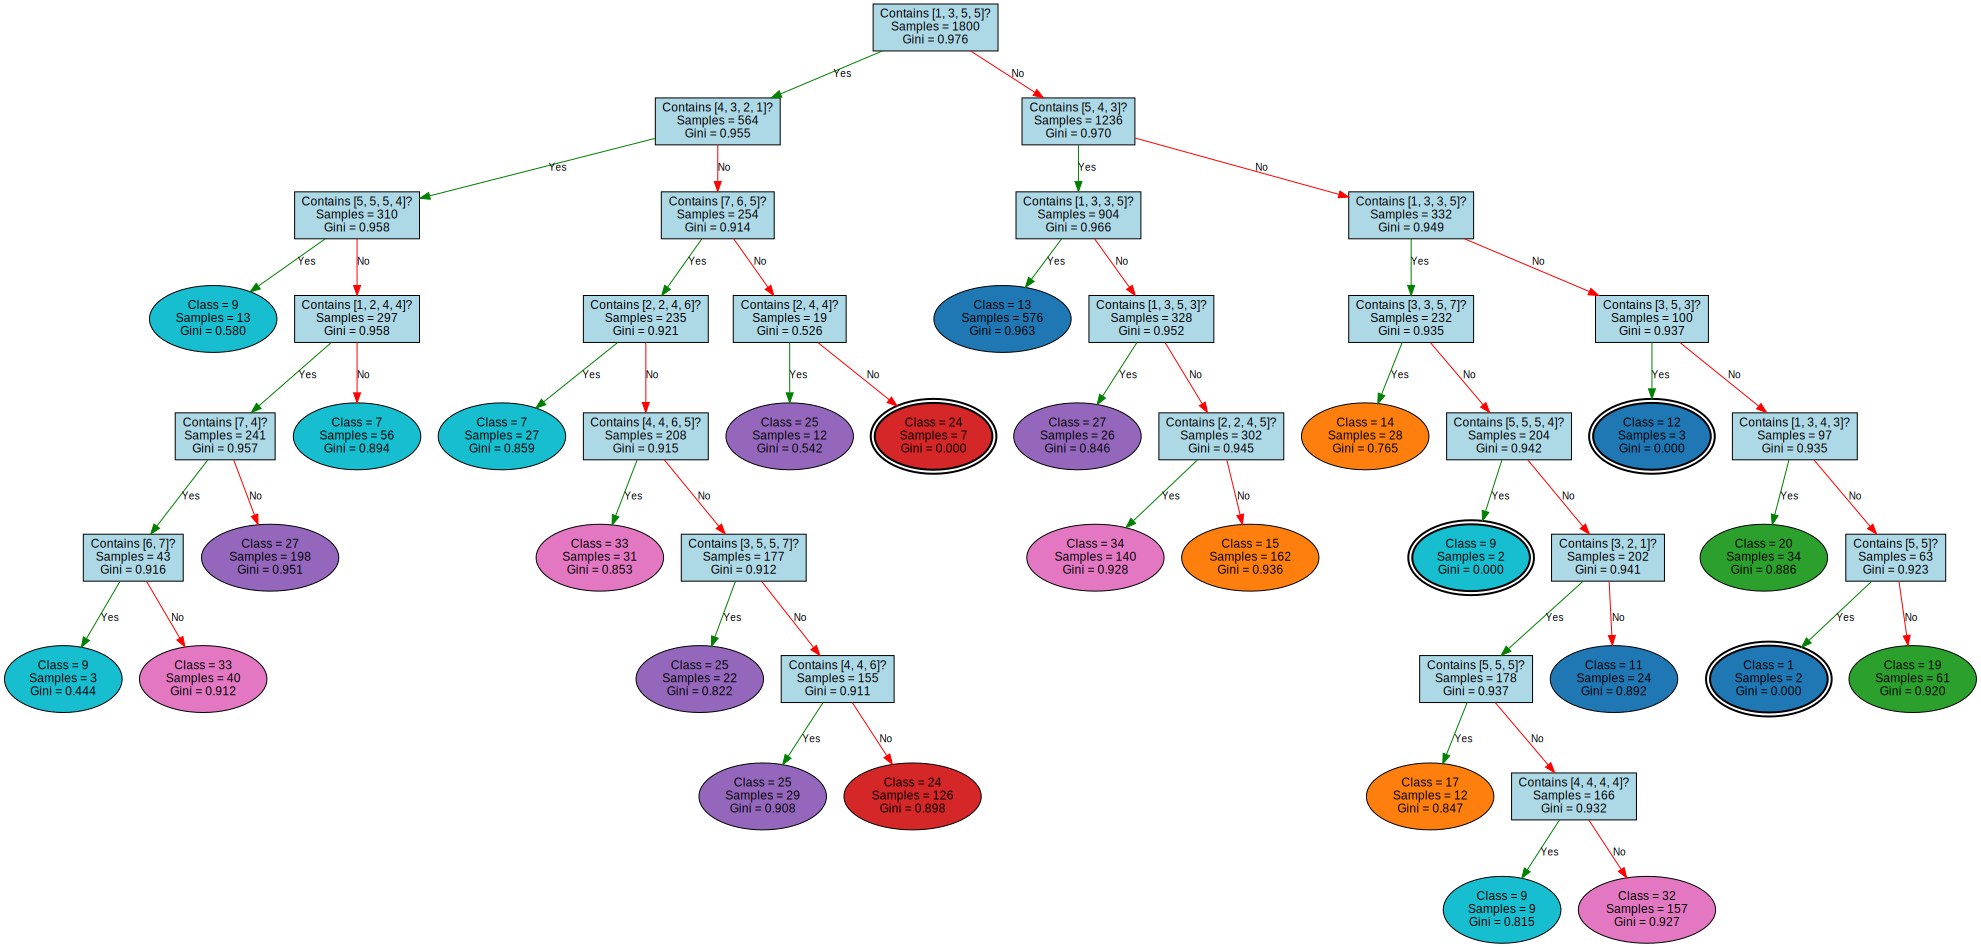

Tree depth: 9


In [9]:
ECG_Analysis("NonInvasiveFetalECGThorax1")

## NonInvasiveFetalECGThorax2


Training set: (1800, 1, 750)
Classes: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


BINS: 3

METHOD: Classic

SeqDT Evaluation (method: Classic, bins: 3)

Dataset Statistics:
Training samples: 1800
Test samples: 1965
Classes: 42
Class distribution (train): {'33': 37, '9': 46, '10': 56, '21': 43, '3': 45, '1': 36, '29': 47, '28': 40, '35': 45, '31': 43, '12': 39, '25': 41, '13': 46, '4': 40, '23': 35, '38': 41, '42': 45, '16': 39, '8': 50, '15': 40, '2': 52, '6': 44, '14': 42, '18': 45, '37': 37, '20': 49, '11': 36, '7': 36, '5': 48, '19': 40, '40': 45, '41': 39, '22': 40, '24': 41, '30': 40, '17': 52, '34': 52, '26': 37, '39': 43, '27': 47, '32': 41, '36': 40}
Sequence length - Min: 750, Max: 750, Avg: 750.00 ± 0.00

Training completed in 4.857s
Confusion matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy:  0.0519
G-m

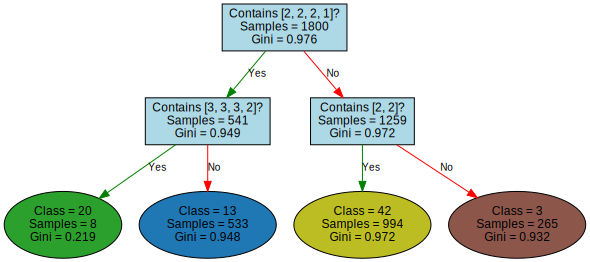

Tree depth: 3

METHOD: RLR



SeqDT Evaluation (method: RLR, bins: 3)

Dataset Statistics:
Training samples: 1800
Test samples: 1965
Classes: 42
Class distribution (train): {'33': 37, '9': 46, '10': 56, '21': 43, '3': 45, '1': 36, '29': 47, '28': 40, '35': 45, '31': 43, '12': 39, '25': 41, '13': 46, '4': 40, '23': 35, '38': 41, '42': 45, '16': 39, '8': 50, '15': 40, '2': 52, '6': 44, '14': 42, '18': 45, '37': 37, '20': 49, '11': 36, '7': 36, '5': 48, '19': 40, '40': 45, '41': 39, '22': 40, '24': 41, '30': 40, '17': 52, '34': 52, '26': 37, '39': 43, '27': 47, '32': 41, '36': 40}
Sequence length - Min: 8, Max: 73, Avg: 17.59 ± 7.29

Training completed in 5.993s
Confusion matrix:
[[ 0 22  0 ...  0  0  0]
 [ 0 28  0 ...  0  0  0]
 [ 0 36  0 ...  0  0  0]
 ...
 [ 0 56  0 ...  0  0  0]
 [ 0 33  0 ...  0  0  0]
 [ 0 33  0 ...  0  0  0]]
Accuracy:  0.0504
G-mean:    0.0000


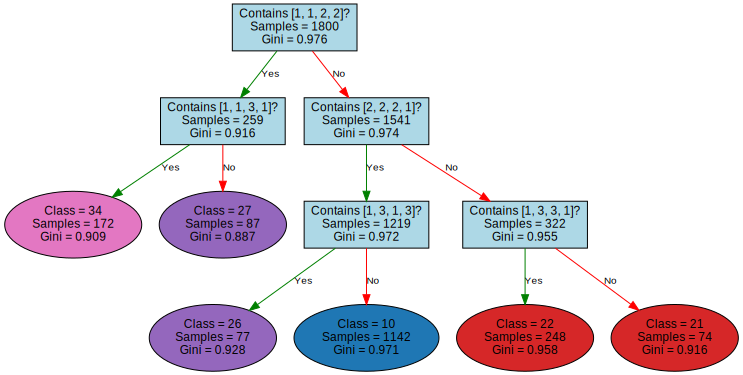

Tree depth: 4


BINS: 5

METHOD: Classic

SeqDT Evaluation (method: Classic, bins: 5)

Dataset Statistics:
Training samples: 1800
Test samples: 1965
Classes: 42
Class distribution (train): {'33': 37, '9': 46, '10': 56, '21': 43, '3': 45, '1': 36, '29': 47, '28': 40, '35': 45, '31': 43, '12': 39, '25': 41, '13': 46, '4': 40, '23': 35, '38': 41, '42': 45, '16': 39, '8': 50, '15': 40, '2': 52, '6': 44, '14': 42, '18': 45, '37': 37, '20': 49, '11': 36, '7': 36, '5': 48, '19': 40, '40': 45, '41': 39, '22': 40, '24': 41, '30': 40, '17': 52, '34': 52, '26': 37, '39': 43, '27': 47, '32': 41, '36': 40}
Sequence length - Min: 750, Max: 750, Avg: 750.00 ± 0.00

Training completed in 16.986s
Confusion matrix:
[[ 0  0  0 ...  0  0  2]
 [ 0  0  0 ...  0 13  0]
 [ 0  0  0 ...  0  0  1]
 ...
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0 21  0]
 [ 0  0  0 ...  0  0  1]]
Accuracy:  0.1186
G-mean:    0.0000


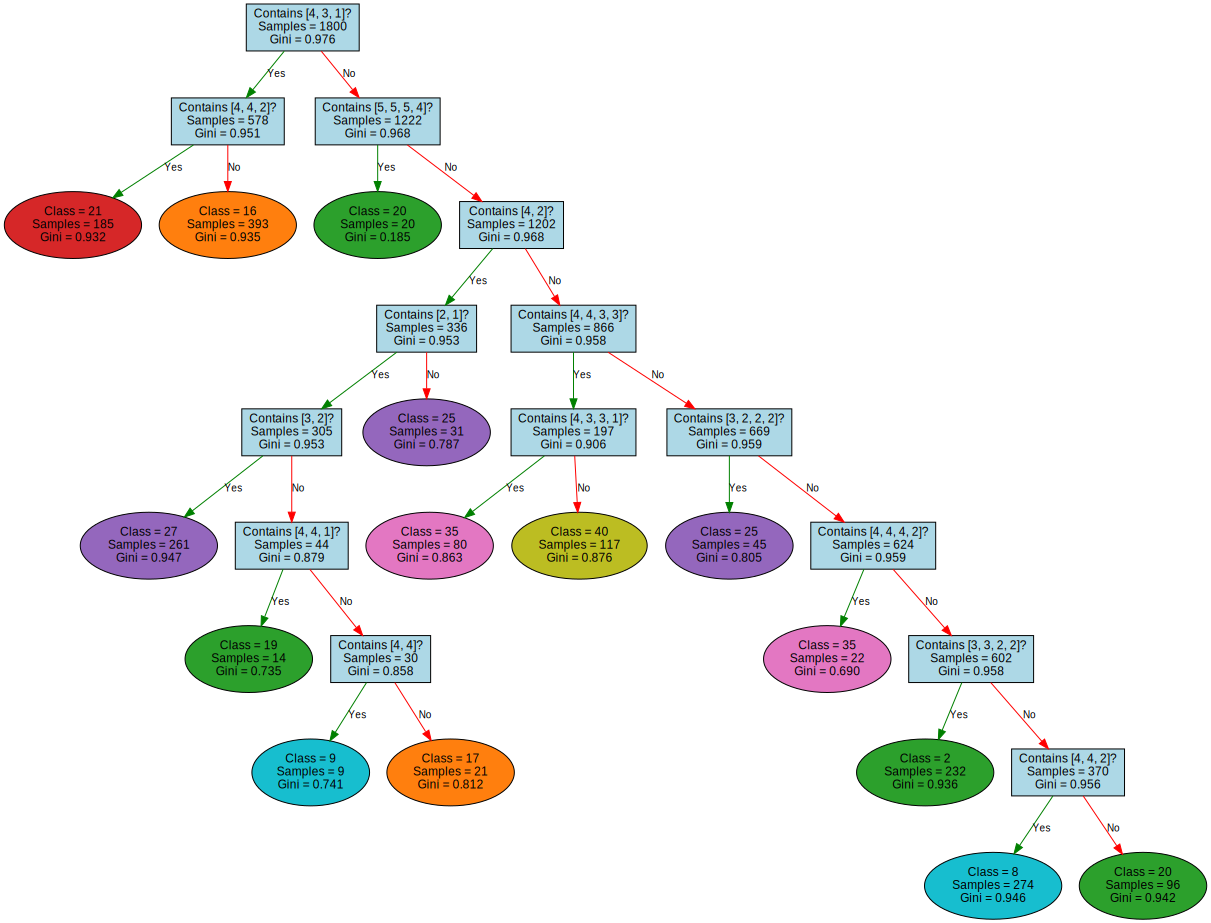

Tree depth: 9

METHOD: RLR



SeqDT Evaluation (method: RLR, bins: 5)

Dataset Statistics:
Training samples: 1800
Test samples: 1965
Classes: 42
Class distribution (train): {'33': 37, '9': 46, '10': 56, '21': 43, '3': 45, '1': 36, '29': 47, '28': 40, '35': 45, '31': 43, '12': 39, '25': 41, '13': 46, '4': 40, '23': 35, '38': 41, '42': 45, '16': 39, '8': 50, '15': 40, '2': 52, '6': 44, '14': 42, '18': 45, '37': 37, '20': 49, '11': 36, '7': 36, '5': 48, '19': 40, '40': 45, '41': 39, '22': 40, '24': 41, '30': 40, '17': 52, '34': 52, '26': 37, '39': 43, '27': 47, '32': 41, '36': 40}
Sequence length - Min: 15, Max: 117, Avg: 25.63 ± 6.62

Training completed in 6.618s
Confusion matrix:
[[ 0  0  0 ...  0 20  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0 17  0]
 ...
 [ 0  0  0 ...  0 17  0]
 [ 0  0  0 ...  0 35  0]
 [ 0  0  0 ...  0  0  0]]
Accuracy:  0.0748
G-mean:    0.0000


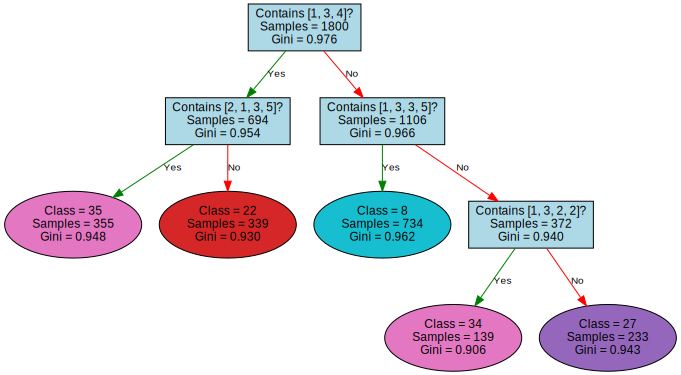

Tree depth: 4


BINS: 7

METHOD: Classic

SeqDT Evaluation (method: Classic, bins: 7)

Dataset Statistics:
Training samples: 1800
Test samples: 1965
Classes: 42
Class distribution (train): {'33': 37, '9': 46, '10': 56, '21': 43, '3': 45, '1': 36, '29': 47, '28': 40, '35': 45, '31': 43, '12': 39, '25': 41, '13': 46, '4': 40, '23': 35, '38': 41, '42': 45, '16': 39, '8': 50, '15': 40, '2': 52, '6': 44, '14': 42, '18': 45, '37': 37, '20': 49, '11': 36, '7': 36, '5': 48, '19': 40, '40': 45, '41': 39, '22': 40, '24': 41, '30': 40, '17': 52, '34': 52, '26': 37, '39': 43, '27': 47, '32': 41, '36': 40}
Sequence length - Min: 750, Max: 750, Avg: 750.00 ± 0.00

Training completed in 42.910s
Confusion matrix:
[[ 1  0  2 ...  0  0  4]
 [ 0  1  0 ...  0  0  0]
 [ 0  0 11 ...  0  0 16]
 ...
 [ 0  0  0 ...  0  0  2]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  5 ...  0  0 13]]
Accuracy:  0.1664
G-mean:    0.0000


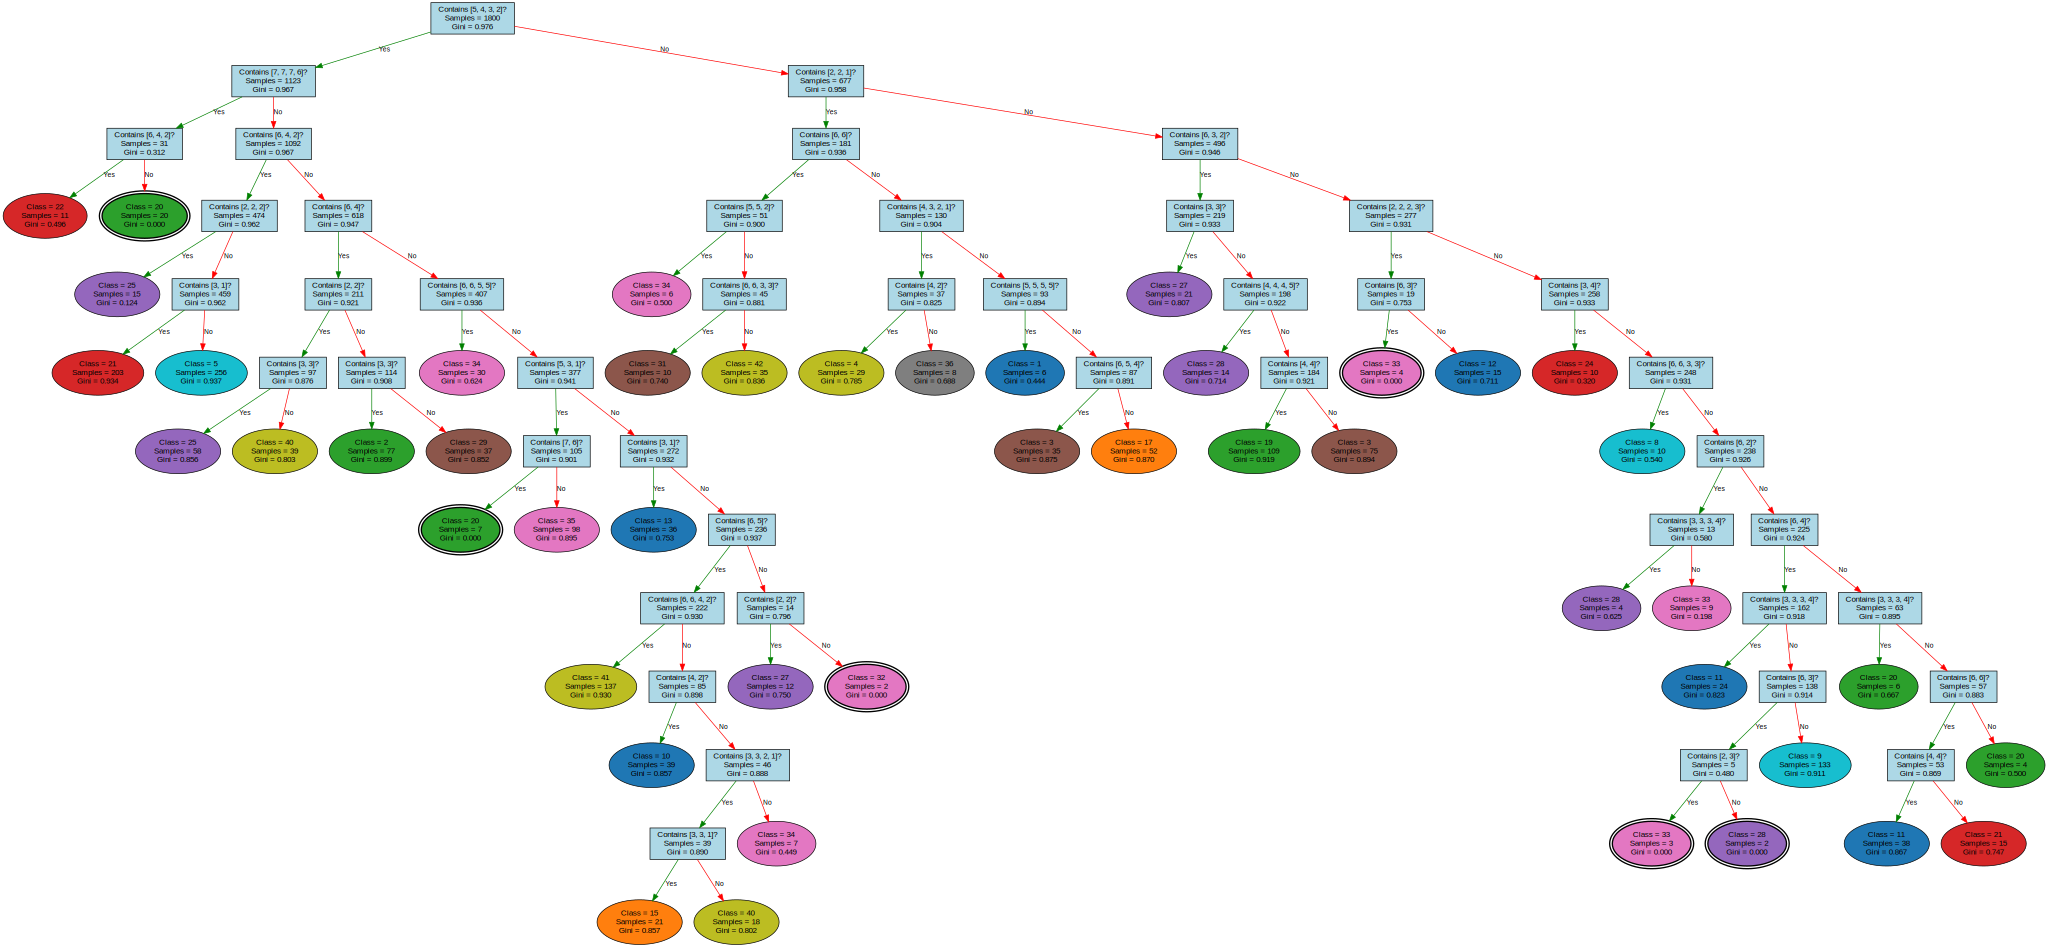

Tree depth: 13

METHOD: RLR



SeqDT Evaluation (method: RLR, bins: 7)

Dataset Statistics:
Training samples: 1800
Test samples: 1965
Classes: 42
Class distribution (train): {'33': 37, '9': 46, '10': 56, '21': 43, '3': 45, '1': 36, '29': 47, '28': 40, '35': 45, '31': 43, '12': 39, '25': 41, '13': 46, '4': 40, '23': 35, '38': 41, '42': 45, '16': 39, '8': 50, '15': 40, '2': 52, '6': 44, '14': 42, '18': 45, '37': 37, '20': 49, '11': 36, '7': 36, '5': 48, '19': 40, '40': 45, '41': 39, '22': 40, '24': 41, '30': 40, '17': 52, '34': 52, '26': 37, '39': 43, '27': 47, '32': 41, '36': 40}
Sequence length - Min: 25, Max: 148, Avg: 38.11 ± 9.53

Training completed in 26.341s
Confusion matrix:
[[ 6  1  7 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 2  3 23 ...  0  0  0]
 ...
 [ 0 31  8 ...  0  0  0]
 [ 0 23  0 ...  0  0  0]
 [ 0  2 14 ...  0  0  0]]
Accuracy:  0.1074
G-mean:    0.0000


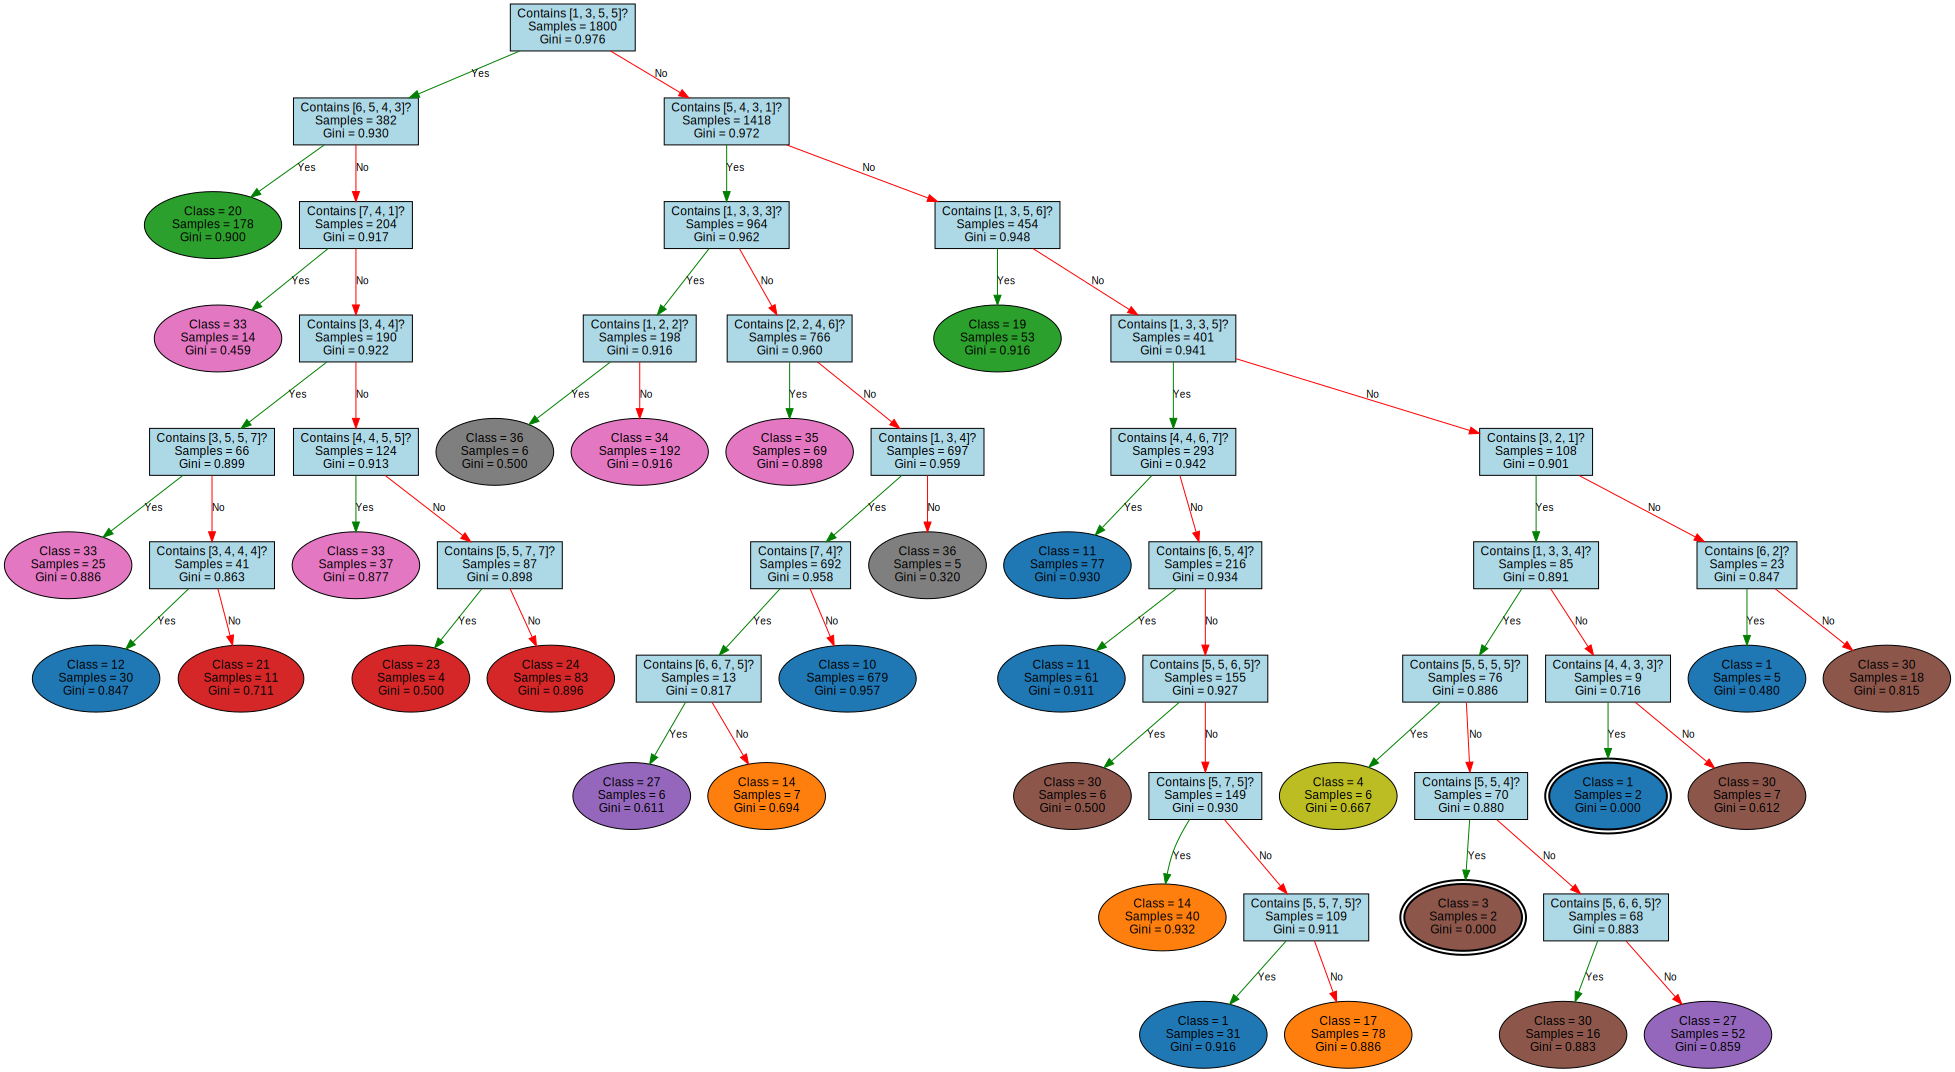

Tree depth: 10


In [10]:
ECG_Analysis("NonInvasiveFetalECGThorax2")

## TwoLeadECG


Training set: (23, 1, 82)
Classes: [1 2]


BINS: 3

METHOD: Classic

SeqDT Evaluation (method: Classic, bins: 3)

Dataset Statistics:
Training samples: 23
Test samples: 1139
Classes: 2
Class distribution (train): {'2': 11, '1': 12}
Sequence length - Min: 82, Max: 82, Avg: 82.00 ± 0.00

Training completed in 0.022s
Confusion matrix:
[[569   0]
 [570   0]]
Accuracy:  0.4996
G-mean:    0.0000


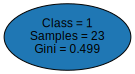

Tree depth: 1

METHOD: RLR



SeqDT Evaluation (method: RLR, bins: 3)

Dataset Statistics:
Training samples: 23
Test samples: 1139
Classes: 2
Class distribution (train): {'2': 11, '1': 12}
Sequence length - Min: 5, Max: 10, Avg: 6.52 ± 1.64

Training completed in 0.033s
Confusion matrix:
[[569   0]
 [570   0]]
Accuracy:  0.4996
G-mean:    0.0000


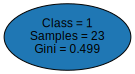

Tree depth: 1


BINS: 5

METHOD: Classic

SeqDT Evaluation (method: Classic, bins: 5)

Dataset Statistics:
Training samples: 23
Test samples: 1139
Classes: 2
Class distribution (train): {'2': 11, '1': 12}
Sequence length - Min: 82, Max: 82, Avg: 82.00 ± 0.00

Training completed in 0.067s
Confusion matrix:
[[512  57]
 [250 320]]
Accuracy:  0.7305
G-mean:    0.7107


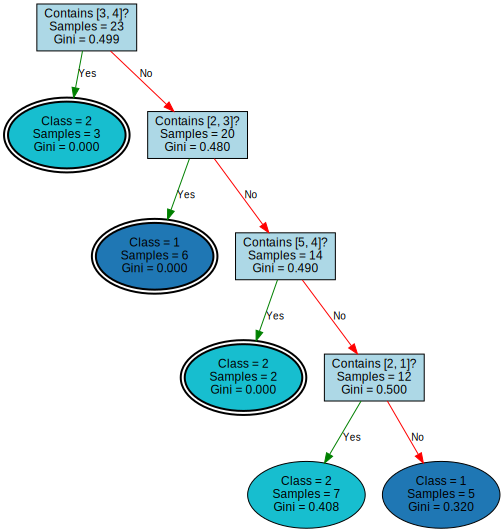

Tree depth: 5

METHOD: RLR



SeqDT Evaluation (method: RLR, bins: 5)

Dataset Statistics:
Training samples: 23
Test samples: 1139
Classes: 2
Class distribution (train): {'2': 11, '1': 12}
Sequence length - Min: 10, Max: 19, Avg: 13.30 ± 2.69

Training completed in 0.040s
Confusion matrix:
[[280 289]
 [ 24 546]]
Accuracy:  0.7252
G-mean:    0.6866


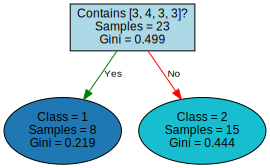

Tree depth: 2


BINS: 7

METHOD: Classic

SeqDT Evaluation (method: Classic, bins: 7)

Dataset Statistics:
Training samples: 23
Test samples: 1139
Classes: 2
Class distribution (train): {'2': 11, '1': 12}
Sequence length - Min: 82, Max: 82, Avg: 82.00 ± 0.00

Training completed in 0.043s
Confusion matrix:
[[474  95]
 [183 387]]
Accuracy:  0.7559
G-mean:    0.7521


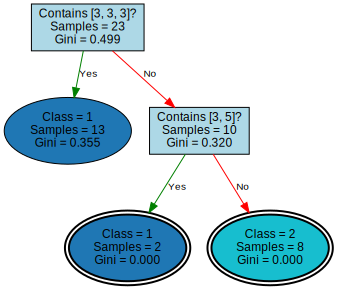

Tree depth: 3

METHOD: RLR



SeqDT Evaluation (method: RLR, bins: 7)

Dataset Statistics:
Training samples: 23
Test samples: 1139
Classes: 2
Class distribution (train): {'2': 11, '1': 12}
Sequence length - Min: 14, Max: 21, Avg: 16.13 ± 1.92

Training completed in 0.063s
Confusion matrix:
[[449 120]
 [180 390]]
Accuracy:  0.7366
G-mean:    0.7348


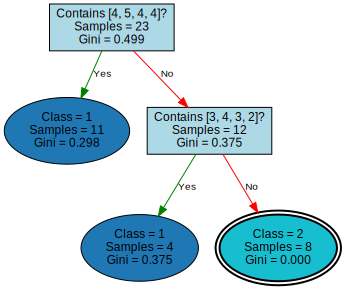

Tree depth: 3


In [11]:
ECG_Analysis("TwoLeadECG")

## Summary

In [15]:
Summary = Summary[['Dataset', 'Method','Bins','Accuracy', 'G-mean', 'Training_Time', 'Tree_Depth']]

In [14]:
Summary.to_csv("TimeSeries_summary.csv", index=False)